---
# Estornos - Maio 2022
---

Notebook para analisar os estornos mensais do hotel Slaviero Essential Curitiba Shopping. As variáveis em análise são:

* **Valor**: valor, em reais, do que foi estornado (crédito ou débito);
* **Data**: período dia/mês/ano em que o estorno foi realizado;
* **Hora**: em qual horário do dia o estorno foi realizado. Utiliza-se o padrão de 12 horas;
* **Usuário**: qual funcionário do SUCT realizou o estorno;
* **Motivo**: jusiticativa do estorno.


## 1. Importações


---



### 1.1 Bibliotecas

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.2 Bases de Dados

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Data/estornos-maio.csv')
dataset.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,107.0,57429723.0,-293.00,5/1/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,32.25,5/1/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,-196.79,5/1/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,-196.24,5/1/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,-30.00,5/1/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


## 2. Tratamento de Dados


---



### 2.1 Compreendendo os tipos de dados

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UH       584 non-null    float64
 1   Reserva  592 non-null    float64
 2   Valor    624 non-null    float64
 3   Data     624 non-null    object 
 4   Hora     624 non-null    object 
 5   Usuário  624 non-null    object 
 6   Qtde     624 non-null    int64  
 7   Motivo   624 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 39.1+ KB


## 2.2 Alterando os nomes das colunas

In [ ]:
new_columns = {
    'UH': 'UH',	
    'Reserva': 'reserva',
    'Descrição': 'descricao',
    'Crédito': 'credito',
    'Débito': 'debito',
    'Valor': 'valor',
    'Data': 'data',
    'Hora': 'hora',
    'Usuário': 'usuario',
    'Qtde.': 'quantidade',
    'Motivo': 'motivo'
}

dataset.rename(columns = new_columns, inplace = True)

## 3. Funções e variáveis padronizados

In [ ]:
palette = ['#0e6580']

In [ ]:
# Definições utilizadas em todos os gráficos

def plot_config():
  sns.set_style('darkgrid')
  plt.figure(figsize=(15, 5))

In [ ]:
''' Função para criação de gráficos de barra
- x:
- y:
- xlabel:
- ylabel:
- title: 
'''

def set_barplot(x, y, data, xlabel, ylabel, title):

  plot_config()
  ax = sns.barplot(x=x, y=y, palette=palette, data=data)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

In [ ]:
''' Função para geração de gráficos de curva
- x:
- y:
- xlabel:
- ylabel:
- title: 
'''

def set_lineplot(x, y, xlabel, ylabel, title):
  plot_config()
  ax = sns.lineplot(x=x, y=y)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

## 4. Análise de Dados

### 4.1 Quantidade de estornos por usuário

In [ ]:
frequency = dataset.usuario.value_counts()
users = dataset.usuario.unique()

users_frequency = pd.DataFrame({'estornos': frequency})
users_frequency.rename_axis('usuarios', axis = 'columns', inplace = True)
users_frequency

usuarios,estornos
RFELIZ,173
CALOLIVEIRA,127
RFREITAS,100
ECSOUSA,65
LPADOVINO,57
IGPESSOA,51
CFIOR,30
ANLGONCALVES,21


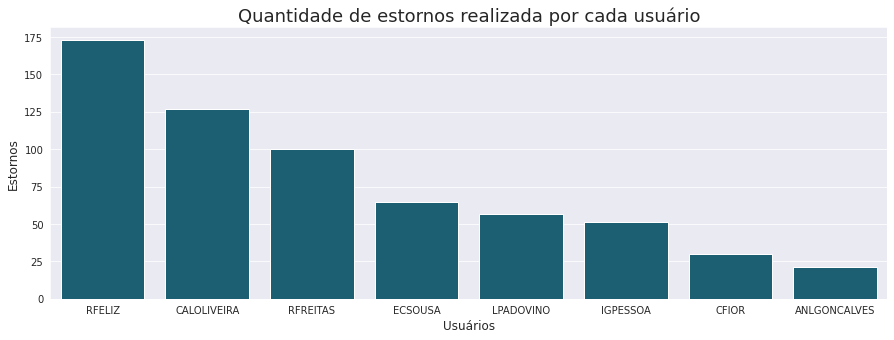

In [ ]:
graphic = set_barplot(users_frequency.index, 'estornos', users_frequency, 
                      'Usuários', 'Estornos', 
                      'Quantidade de estornos realizada por cada usuário')
graphic

### 4.2 Quantidade de estornos diários

In [ ]:
refunds_per_day = dataset.data.value_counts()
days = dataset.data.unique()

for i in range(0, len(days)):
  days[i] = days[i][3:5]

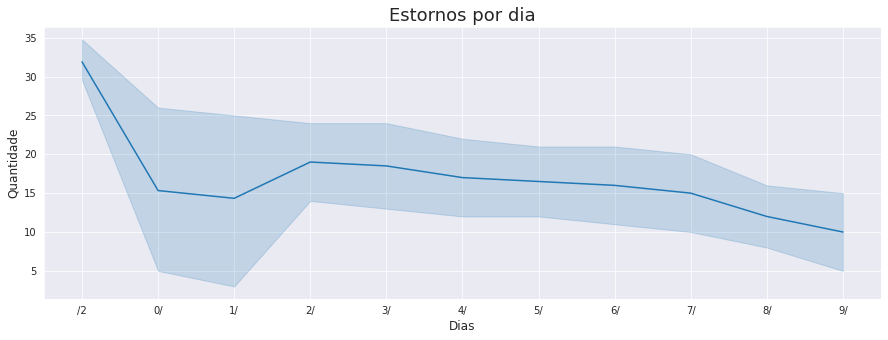

In [ ]:
set_lineplot(days, refunds_per_day, "Dias", 'Quantidade', 'Estornos por dia')

In [ ]:
dataset.head()

,UH,reserva,valor,data,hora,usuario,Qtde,motivo
0,107.0,57429723.0,-293.00,5/1/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,32.25,5/1/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,-196.79,5/1/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,-196.24,5/1/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,-30.00,5/1/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


### 4.3 Quantidade de estornos realizada por cada usuário (classificação)

In [ ]:
frequencia = pd.crosstab(dataset['usuario'], dataset['motivo'])
frequencia

motivo,AUTORIZADO PELO GERENT,CORTESIA DE DIÁRIAS,ERRO DE LANÇAMENTO,ERRO DO SISTEMA,ERRO NA IMPRESSÃO,Erro de Laçto,HOSPEDE NÃO CONSUMIU,LCTO EM DUPLICIDADE,VALOR DIARA INCORRETO
usuario,,,,,,,,,
ANLGONCALVES,0,0,21,0,0,0,0,0,0
CALOLIVEIRA,109,0,2,2,0,11,3,0,0
CFIOR,0,0,23,2,0,1,4,0,0
ECSOUSA,4,2,34,6,0,3,14,0,2
IGPESSOA,9,0,25,1,0,7,9,0,0
LPADOVINO,8,0,28,0,0,11,10,0,0
RFELIZ,1,11,99,21,0,11,21,9,0
RFREITAS,0,0,58,9,1,6,5,21,0


### 4.4 Valor total de estornos por dia

In [ ]:
valor_por_dia = dataset.groupby(['data'])['valor'].sum()

In [ ]:
for i in range(0, len(valor_por_dia)):
  if valor_por_dia[i] <= 0:
    valor_por_dia[i] *= -1

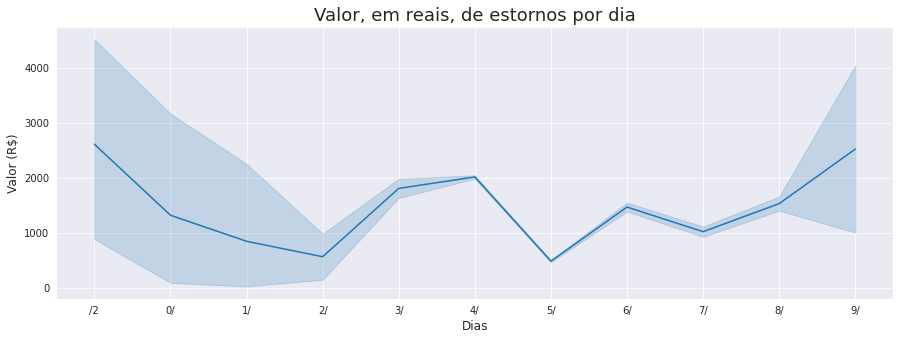

In [ ]:
set_lineplot(days, valor_por_dia, "Dias", 'Valor (R$)', 'Valor, em reais, de estornos por dia')